In [7]:
import pandas as pd

columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship","study_hours",
    "party_week","drinks_night","missed_classes", "failed_classes", "in_relationship","parent_approve","relation_parent"
]

student_data = pd.read_csv("Stats survey.csv", names = columns_name, header = 0)

In [8]:
student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [9]:
student_data.drop("time", axis =1, inplace=True)

In [10]:
student_data.head()

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


# Exploratory Data Analysis (EDA)

* Basix information
* Traget specific: Exploration and visualization
* Correlations


In [13]:
student_data.info() # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           404 non-null    object 
 1   matric_%         399 non-null    float64
 2   study_year       333 non-null    object 
 3   faculty          399 non-null    object 
 4   gpa_2023         320 non-null    float64
 5   accomodation     383 non-null    object 
 6   allowance        375 non-null    object 
 7   scholarship      398 non-null    object 
 8   study_hours      403 non-null    object 
 9   party_week       404 non-null    object 
 10  drinks_night     404 non-null    object 
 11  missed_classes   403 non-null    object 
 12  failed_classes   403 non-null    object 
 13  in_relationship  403 non-null    object 
 14  parent_approve   402 non-null    object 
 15  relation_parent  403 non-null    object 
dtypes: float64(2), object(14)
memory usage: 50.9+ KB


In [15]:
student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

-- description --

In [17]:
student_data.gender.value_counts()

gender
Male      216
Female    188
Name: count, dtype: int64

In [18]:
student_data.gender.value_counts(normalize = True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

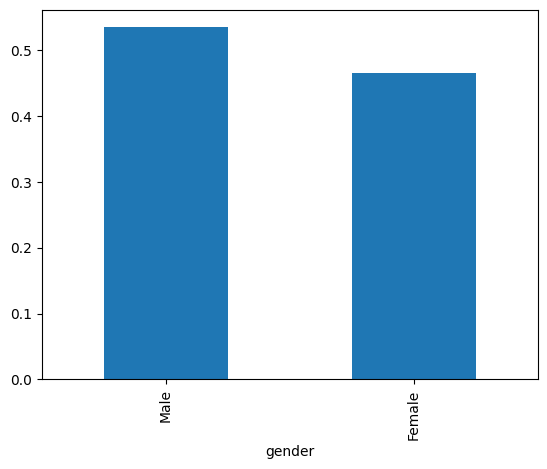

In [20]:
student_data.gender.value_counts(normalize = True).plot(kind ="bar")

<Axes: ylabel='proportion'>

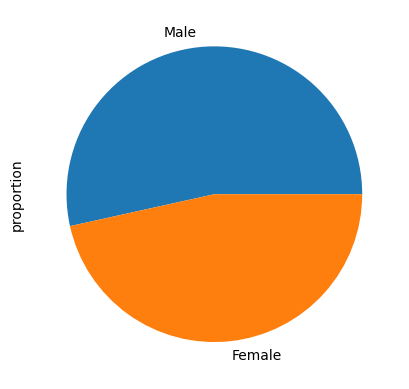

In [21]:
student_data.gender.value_counts(normalize = True).plot(kind ="pie")

-- description --- add...

In [22]:
#parent approval and parent relationship

table = pd.crosstab(student_data.parent_approve,student_data.relation_parent)
table

relation_parent,Close,Distant,Fair,Very close
parent_approve,,,,
No,18,1,9,20
Yes,79,1,25,248


In [23]:
table = table[["Distant", "Fair", "Close", "Very close"]]
table

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,20
Yes,1,25,79,248


<Axes: xlabel='parent_approve'>

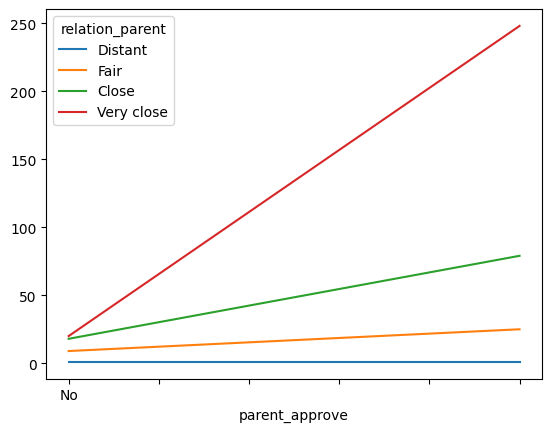

In [25]:
table.plot(kind = "line")

In [26]:
table.T

parent_approve,No,Yes
relation_parent,,
Distant,1,1
Fair,9,25
Close,18,79
Very close,20,248


<Axes: xlabel='relation_parent'>

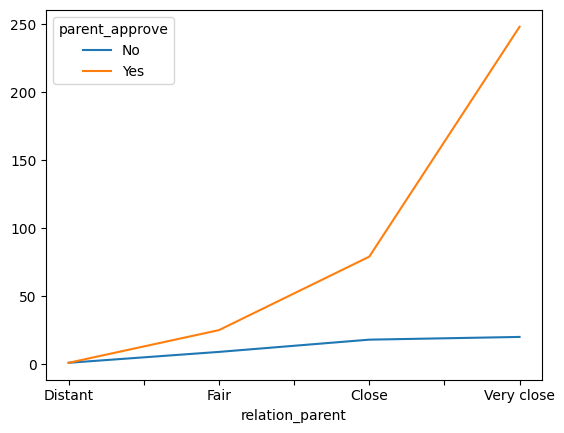

In [28]:
table.T.plot(kind = "line")

In [29]:
# relation with parent and core gained HS

group_parent_relation = student_data.groupby(by = "relation_parent")

In [30]:
group_parent_relation["matric_%"].mean()

relation_parent
Close         77.690000
Distant       91.500000
Fair          78.357143
Very close    77.960114
Name: matric_%, dtype: float64

In [31]:
group_parent_relation["matric_%"].aggregate(("min", "max", "mean"))

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.960114
